In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Step 1: Read the dataset (replace 'your_data.csv' with your actual dataset path)
file_path = r'../raw-data/benin-malanville.csv'
df = pd.read_csv(file_path)

# Step 2: Check for missing values in the critical columns
critical_columns = ['GHI', 'DNI', 'Tamb']  # Add any other critical columns as needed
missing_data = df[critical_columns].isnull().sum()
print(f"Missing data in critical columns:\n{missing_data}\n")

# Step 3a: Interpolation (Fill missing values with interpolated data)

# For numerical columns (GHI, DNI, temperature), use linear interpolation
df[critical_columns] = df[critical_columns].interpolate(method='linear', axis=0)

# You can also use other interpolation methods like 'polynomial' if necessary
# df[critical_columns] = df[critical_columns].interpolate(method='polynomial', order=2, axis=0)

# Step 3b: Alternatively, you can drop rows with missing values in critical columns
# This removes any rows that have NaN values in the selected columns
df = df.dropna(subset=critical_columns)

# Step 4: Verify that missing data has been handled
missing_data_after = df[critical_columns].isnull().sum()
print(f"Missing data after handling:\n{missing_data_after}\n")

# Step 5: Save the cleaned dataset (if necessary)
df.to_csv(r'../raw-data/cleaned_data.csv', index=False)

Missing data in critical columns:
GHI     0
DNI     0
Tamb    0
dtype: int64

Missing data after handling:
GHI     0
DNI     0
Tamb    0
dtype: int64



In [33]:
import os

file_path = r'C:\Users\ufanc\OneDrive\Desktop\10Academy\week one\wk01-solar-data\raw-data\benin-malanville.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
else:
    print(f"Error: File not found at {file_path}")

File loaded successfully!


In [47]:
print(df.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')


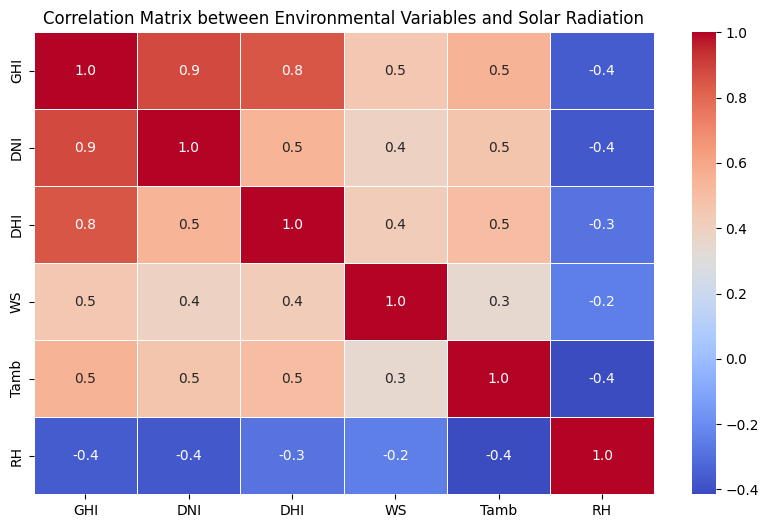

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Select the relevant columns for analysis
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'RH']

# Compute the correlation matrix between the selected variables
correlation_matrix = df[variables].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Matrix between Environmental Variables and Solar Radiation')
plt.show()

In [54]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Convert the Timestamp column to a datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M')

# Check the result
print(df['Timestamp'].head())

KeyError: 'Timestamp'

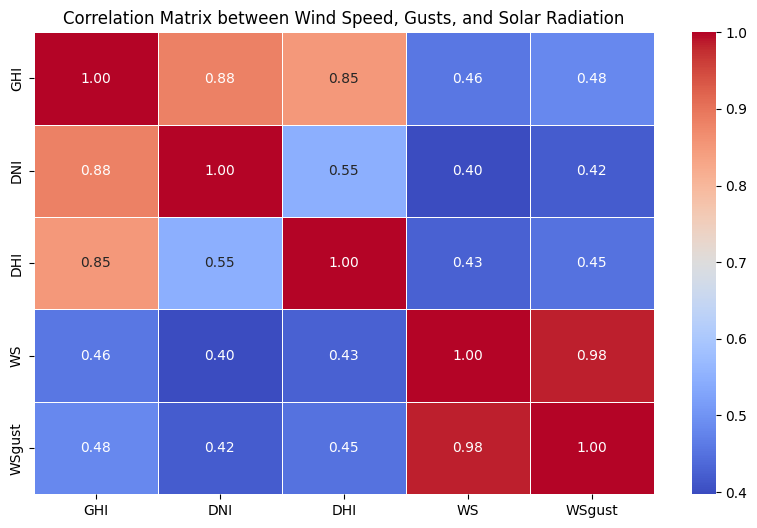

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Select the relevant columns for analysis
variables = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust']

# Compute the correlation matrix between wind variables and solar radiation
correlation_matrix = df[variables].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Wind Speed, Gusts, and Solar Radiation')
plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is loaded into a DataFrame called df

# Create a DataFrame for the rows where cleaning occurred (Cleaning = 1)
cleaning_data = df[df['Cleaning'] == 1]

# Create a DataFrame for the rows where no cleaning occurred (Cleaning = 0)
no_cleaning_data = df[df['Cleaning'] == 0]

# Compare ModA and ModB values before and after cleaning
# Calculate the mean radiation values before and after cleaning
mean_modA_cleaning = cleaning_data['ModA'].mean()
mean_modB_cleaning = cleaning_data['ModB'].mean()

mean_modA_no_cleaning = no_cleaning_data['ModA'].mean()
mean_modB_no_cleaning = no_cleaning_data['ModB'].mean()

print(f"Average ModA (with cleaning): {mean_modA_cleaning}")
print(f"Average ModB (with cleaning): {mean_modB_cleaning}")
print(f"Average ModA (without cleaning): {mean_modA_no_cleaning}")
print(f"Average ModB (without cleaning): {mean_modB_no_cleaning}")

Average ModA (with cleaning): 307.2292783505155
Average ModB (with cleaning): 301.9721649484536
Average ModA (without cleaning): 236.52425278272378
Average ModB (without cleaning): 228.81607076545137


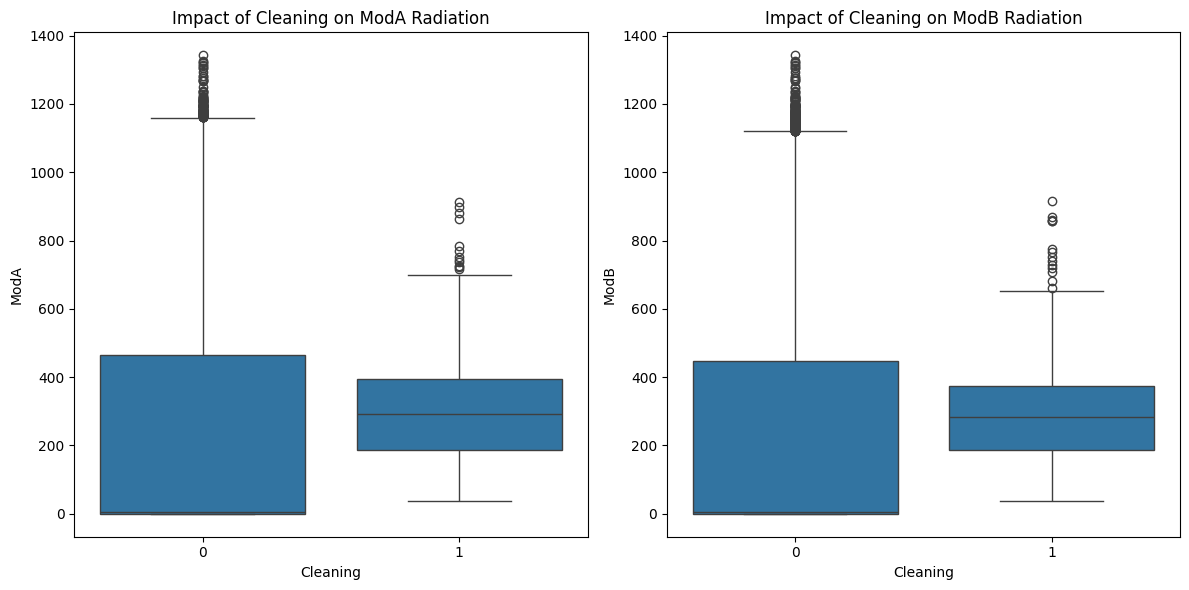

In [59]:
# Plotting ModA and ModB radiation levels before and after cleaning
plt.figure(figsize=(12, 6))

# Plot ModA values
plt.subplot(1, 2, 1)
sns.boxplot(x='Cleaning', y='ModA', data=df)
plt.title('Impact of Cleaning on ModA Radiation')

# Plot ModB values
plt.subplot(1, 2, 2)
sns.boxplot(x='Cleaning', y='ModB', data=df)
plt.title('Impact of Cleaning on ModB Radiation')

plt.tight_layout()
plt.show()

In [60]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'

# Define a function to detect outliers using the IQR method
def detect_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the outlier bounds (1.5 times the IQR from Q1 and Q3)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers: values outside the bounds are considered outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

# Detect outliers for wind speed, temperature, and precipitation
wind_speed_outliers = detect_outliers(df, 'WS')
temperature_outliers = detect_outliers(df, 'Tamb')
precipitation_outliers = detect_outliers(df, 'Precipitation')

# Display the outliers
print("Outliers in Wind Speed:")
print(wind_speed_outliers[['Timestamp', 'WS']])

print("\nOutliers in Temperature:")
print(temperature_outliers[['Timestamp', 'Tamb']])

print("\nOutliers in Precipitation:")
print(precipitation_outliers[['Timestamp', 'Precipitation']])

Outliers in Wind Speed:


KeyError: "['Timestamp'] not in index"

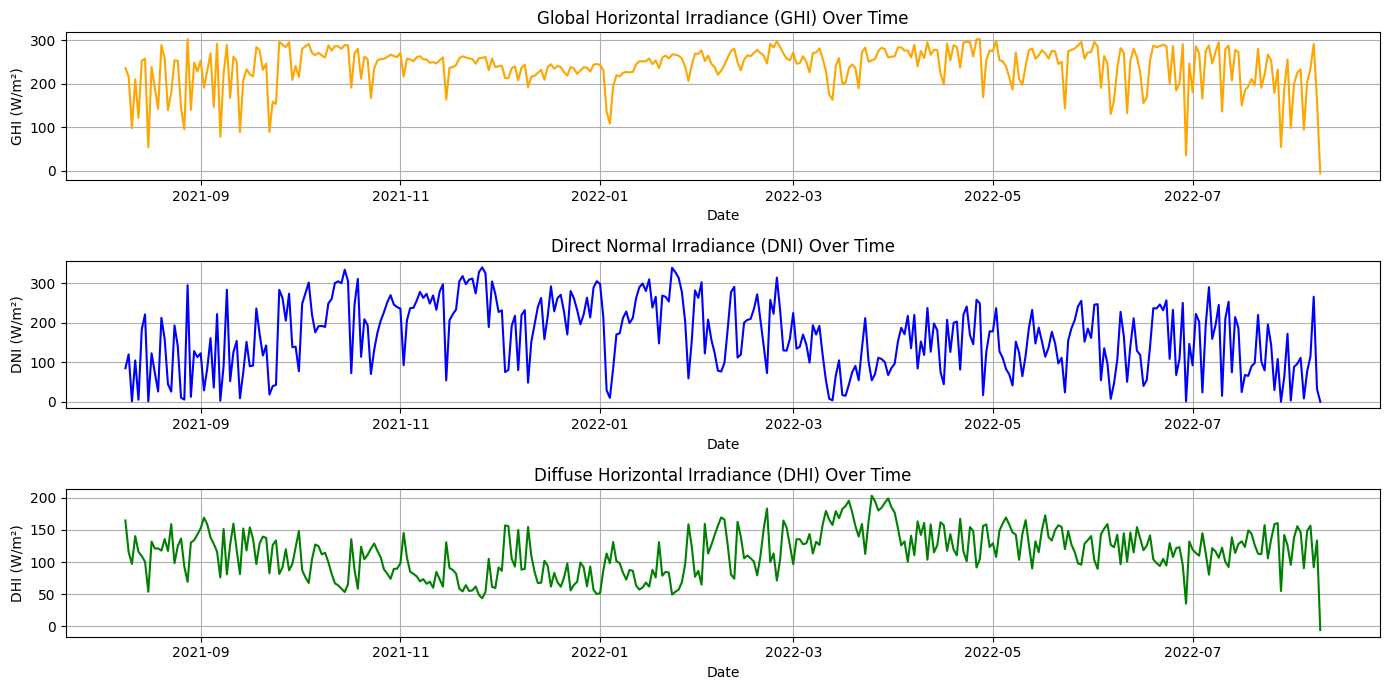

C:\Users\ufanc\AppData\Local\Temp\ipykernel_39292\132586085.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


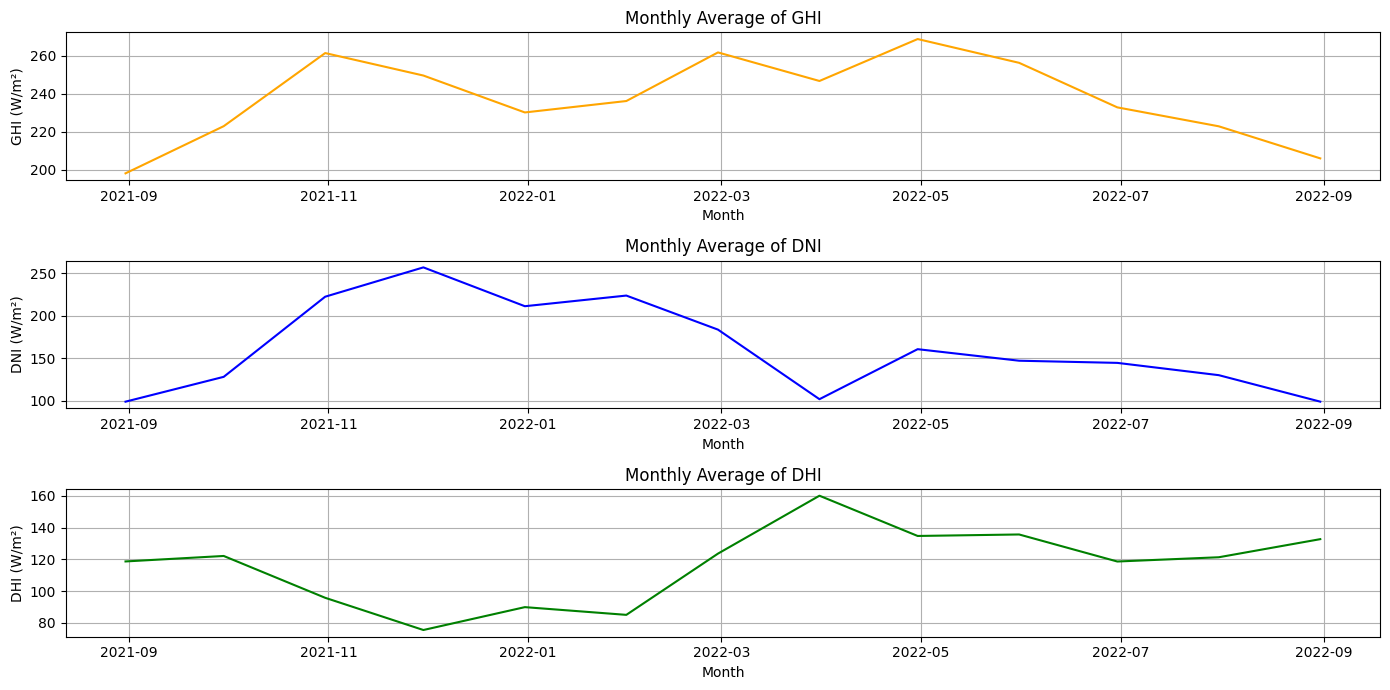

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame called 'df'
# Ensure that the 'Timestamp' column is already in datetime format as per previous steps

# Set the 'Timestamp' as the index for time series analysis
df.set_index('Timestamp', inplace=True)

# Resample the data to daily frequency for better visualization of trends
df_daily = df.resample('D').mean()

# Plotting the time series for GHI, DNI, and DHI
plt.figure(figsize=(14, 7))

# Plot for GHI
plt.subplot(3, 1, 1)
plt.plot(df_daily.index, df_daily['GHI'], label='GHI (W/m²)', color='orange')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Plot for DNI
plt.subplot(3, 1, 2)
plt.plot(df_daily.index, df_daily['DNI'], label='DNI (W/m²)', color='blue')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

# Plot for DHI
plt.subplot(3, 1, 3)
plt.plot(df_daily.index, df_daily['DHI'], label='DHI (W/m²)', color='green')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

# Additional: Seasonal and weather-related patterns can be visualized by plotting monthly or weekly trends
df_monthly = df.resample('M').mean()

plt.figure(figsize=(14, 7))

# Plot for GHI (Monthly average)
plt.subplot(3, 1, 1)
plt.plot(df_monthly.index, df_monthly['GHI'], label='GHI (W/m²)', color='orange')
plt.title('Monthly Average of GHI')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Plot for DNI (Monthly average)
plt.subplot(3, 1, 2)
plt.plot(df_monthly.index, df_monthly['DNI'], label='DNI (W/m²)', color='blue')
plt.title('Monthly Average of DNI')
plt.xlabel('Month')
plt.ylabel('DNI (W/m²)')
plt.grid(True)

# Plot for DHI (Monthly average)
plt.subplot(3, 1, 3)
plt.plot(df_monthly.index, df_monthly['DHI'], label='DHI (W/m²)', color='green')
plt.title('Monthly Average of DHI')
plt.xlabel('Month')
plt.ylabel('DHI (W/m²)')
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


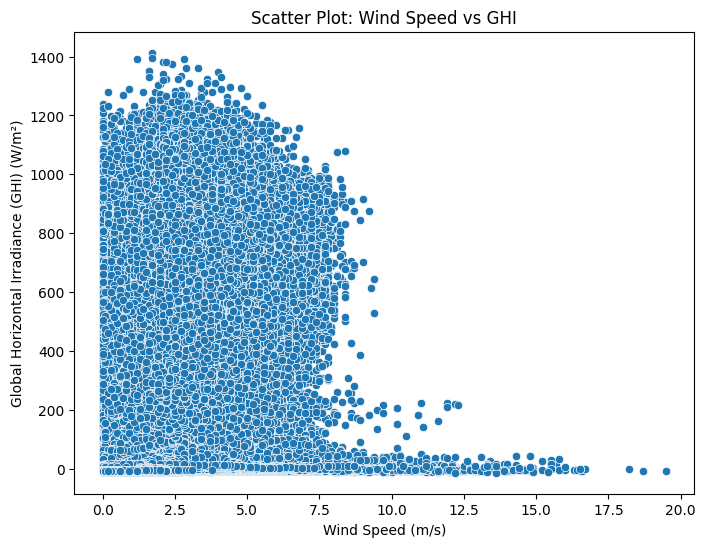

In [ ]:
# Scatter plot between Wind Speed (WS) and GHI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['WS'], y=df['GHI'])
plt.title('Scatter Plot: Wind Speed vs GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Global Horizontal Irradiance (GHI) (W/m²)')
plt.show()

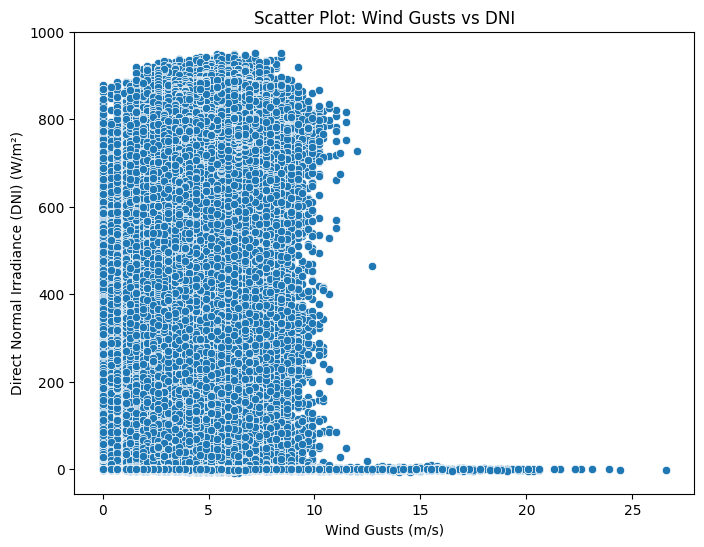

In [ ]:
# Scatter plot between Wind Gusts (WSgust) and DNI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['WSgust'], y=df['DNI'])
plt.title('Scatter Plot: Wind Gusts vs DNI')
plt.xlabel('Wind Gusts (m/s)')
plt.ylabel('Direct Normal Irradiance (DNI) (W/m²)')
plt.show()

In [ ]:
print(df.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')


In [ ]:
# Time-based plot for Wind Speed (WS) and GHI
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['WS'], label='Wind Speed (WS)', color='blue', alpha=0.6)
plt.plot(df['Timestamp'], df['GHI'], label='Global Horizontal Irradiance (GHI)', color='orange', alpha=0.6)
plt.title('Wind Speed and Solar Radiation over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value (Wind Speed in m/s, GHI in W/m²)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

KeyError: 'Timestamp'

<Figure size 1200x600 with 0 Axes>